## 本專題主要針對KKBOX所提供共5份資料(如下)，主要目標為針對客戶是否流失進行分析。

|   RawData                  |  說明                |特徵說明   |
|----------------------------|----------------------|----------|
| sample_submission_zero.csv | Testing Data         |user_id, 流失值|
|train.csv                   | Training Data        |user_id, 流失值|
|members.csv                 | 客戶個人資料          |年齡,居住地等|
|ransactions.csv             | 客戶交易資料          |付費方案,費用等|
|user_logs.csv               | 使用者紀錄            |每日聽歌秒數,聽歌長短|

### ***※各資料中的欄位特徵變數於最下方有個別解釋以及資料分佈的觀察。***

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# 轉換日期
def dtype_compressor(df):
  #object 
  # when unique ratio > 0.5, catogory stands less memory than object
  converted_obj = pd.DataFrame()
  df_obj = df.select_dtypes(include=['object'])
  for col in df_obj.columns:
    converted_obj.loc[:,col] = df_obj.loc[:,col].astype('category')

  # numbers
  df_down_num = pd.DataFrame()
  df_num = df.select_dtypes(include=['number'])
  for col in df_num.columns:
    df_down_num.loc[:,col] = pd.to_numeric(df_num.loc[:,col],downcast='signed')

  # merge
  df = pd.concat([converted_obj,df_down_num],axis=1)
  
  del converted_obj, df_obj, df_down_num, df_num  
  
  return df

In [3]:
def fast_datetime(s):
    dates = {date:pd.to_datetime(date,format='%Y%m%d') for date in s.unique()}
    return s.map(dates)

### 1. Testing Set_01
* 資料檔：sample_submission_zero.csv(說明：the test set, containing the user ids, in the format that we expect you to submit)
* 特徵：is_churn: This is what you will predict. Churn is defined as whether the user did not continue the subscription within 30 days of expiration. is_churn = 1 means 流失,is_churn = 0 means renewal.

In [4]:
# kk_submission01 = pd.read_csv("sample_submission_zero.csv")

In [5]:
# kk_submission01.head()

In [6]:
# kk_submission01.describe()

In [7]:
# kk_submission01.info()

In [8]:
# kk_submission01["is_churn"].unique()  # 特徵is_churn只有0，沒有其他值

In [9]:
# print((kk_submission01["is_churn"] == 0).sum())  # 特徵is_churn=0共有970960
# print((kk_submission01["is_churn"] == 1).sum())  # 特徵is_churn=1共有0

### 2. Testing Set_02
* 資料檔：sample_submission_v2.csv(說明：same format as sample_submission_zero.csv, refreshed 11/06/2017, contains the test data for April, 2017.)

In [10]:
# kk_submission02 = pd.read_csv("sample_submission_v2.csv")

In [11]:
# kk_submission02.head()

In [12]:
# kk_submission02.info()

In [13]:
# kk_submission02["is_churn"].unique() # 特徵is_churn只有0，沒有其他值

In [14]:
# print((kk_submission02["is_churn"] == 0).sum())
# print((kk_submission02["is_churn"] == 1).sum())  # 特徵is_churn=1共有0

* **小結: sample_submission與sample_submission_v2沒有流失值**

### 1+2. Submission Data(合併Testing Set_01 + Testing Set_02)

In [15]:
# kk_Test = pd.concat([kk_submission01, kk_submission02], axis=0)

In [16]:
# kk_Test.head()

In [17]:
# kk_Test.info()

=================================================================================

### 3. Training Set_01
* 資料檔：train.csv(說明：the train set, containing the user ids and whether they have churned.)
* 特徵A. msno: user id
* 特徵B. is_churn: This is the target variable. Churn is defined as whether the user did not continue the subscription within 30 days of expiration. is_churn = 1 means churn,is_churn = 0 means renewal.

In [18]:
kk_train01 = pd.read_csv("train.csv")

In [47]:
# kk_train01.head()

In [21]:
# kk_train01.info()

In [22]:
kk_train01["is_churn"].unique()

array([1, 0], dtype=int64)

In [23]:
print((kk_train01["is_churn"] == 0).sum())
print((kk_train01["is_churn"] == 1).sum())

929460
63471


### 4. Testing Set_02
* 資料檔：train_v2.csv(說明：same format as train.csv, refreshed 11/06/2017, contains the churn data for March, 2017.)

In [24]:
kk_train02 = pd.read_csv("train_v2.csv")

In [48]:
# kk_train02.head()

In [26]:
# kk_train02.info()

In [27]:
kk_train02["is_churn"].unique()

array([1, 0], dtype=int64)

In [28]:
print((kk_train02["is_churn"] == 0).sum())
print((kk_train02["is_churn"] == 1).sum())

883630
87330


## -------------------------------------------------------------------------------------------------

### 3+4. Training Data(合併Training Set_01與Training Set_02)

In [29]:
kk_train = pd.concat([kk_train01, kk_train02], axis=0)

In [30]:
kk_train.shape   # 共196萬筆

(1963891, 2)

In [49]:
kk_train.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [32]:
# kk_train.describe()

In [32]:
print((kk_train["is_churn"] == 0).sum())
print((kk_train["is_churn"] == 1).sum())

1813090
150801


### ※小結: 流失人數 vs 續約人數比例差異較大

## ====================================================================

### 5. 客戶資料
* **資料檔：members.csv(說明：user information. Note that not every user in the dataset is available.)**
* 特徵A. bd: age. Note: this column has outlier values ranging from -7000 to 2015, please use your judgement.
* 特徵B. registered_via: registration method
* 特徵C. registration_init_time: format %Y%m%d
* 特徵D. expiration_date: format %Y%m%d, taken as a snapshot at which the member.csv is extracted. Not representing the actual churn behavior.=>Raw Data沒看到這一項特徵

In [33]:
kk_members = pd.read_csv("members_v3.csv")

In [34]:
kk_members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [35]:
print(kk_members.shape)  # 共6769473筆資料
print(kk_members["gender"].unique())
print(kk_members["gender"].isnull().sum())  # 性別項空值有442萬項
print((kk_members["gender"] == "female").sum())  # 女性人數114萬
print((kk_members["gender"] == "male").sum())  # 男性人數119萬

(6769473, 6)
[nan 'female' 'male']
4429505
1144613
1195355


* **欄位特徵說明於下方與Training Data合併表格中說明**

## =======================================================

### 6. 交易資料_01
* **資料檔：transactions.csv(說明：transactions of users up until 2/28/2017.)**
* 特徵A. msno: user id
* 特徵B. payment_method_id: payment method
* 特徵C. payment_plan_days: length of membership plan in days
* 特徵D. plan_list_price: in New Taiwan Dollar (NTD)
* 特徵E. actual_amount_paid:  in New Taiwan Dollar (NTD)
* 特徵F. transaction_date: format %Y%m%d
* 特徵G. membership_expire_date: format %Y%m%d
* 特徵H. is_cancel: whether or not the user canceled the membership in this transaction.

In [36]:
kk_transac01 = pd.read_csv("transactions.csv")

In [50]:
# kk_transac01.head()

### 7. 交易資料_02
* **資料檔：transactions_v2.csv(說明：same format as transactions.csv, refreshed 11/06/2017, contains the transactions data until 3/31/2017.)**

In [38]:
kk_transac02 = pd.read_csv("transactions_v2.csv")

In [51]:
# kk_transac02.head()

## ----------------------------------------------------------------------------------------------

### 6+7. 交易資料(合併Transaction_01與Transaction_02)

In [52]:
kk_transaction = pd.concat([kk_transac01, kk_transac02], axis=0)

In [53]:
# rename the columns
date_rename = {'transaction_date':'trans_date', 'membership_expire_date':'mem_expire_date'}
kk_transaction.rename(columns=date_rename,inplace=True)

# converting
kk_transaction = dtype_compressor(kk_transaction)

d = ['trans_date', 'mem_expire_date']
for col in d:
  kk_transaction[col] = fast_datetime(kk_transaction[col])

In [54]:
kk_transaction.head(3)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,trans_date,mem_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0


In [55]:
kk_transaction.shape # 共22978755筆資料，9個特徵

(22978755, 9)

In [56]:
# (kk_transaction["msno"] == "YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=").sum() # 取某個user的交易資料筆數有27筆

In [57]:
tmp1 = kk_transaction[kk_transaction["msno"] == "YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc="].sort_values('trans_date').head(3) # 取此user某3筆交易資料
tmp1

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,trans_date,mem_expire_date,is_cancel
7619099,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-01-31,2015-03-01,0
1917887,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-02-28,2015-04-01,0
15543991,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-03-31,2015-05-01,0


In [58]:
del tmp1  # 清理memory

* **交易方法是經過編碼的，以編碼41的交易方式最頻繁：**

In [59]:
# kk_transaction["payment_method_id"].unique()

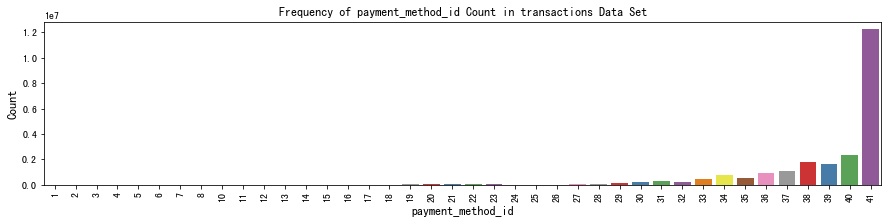

In [60]:
plt.figure(figsize=(15,3))
sns.countplot(x="payment_method_id", data=kk_transaction, palette = "Set1")
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_method_id', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()

* **共約55種天數方案，其中以30天(月租)的方案最常見，共約2017萬筆：**

In [61]:
# kk_transaction["payment_plan_days"].unique()

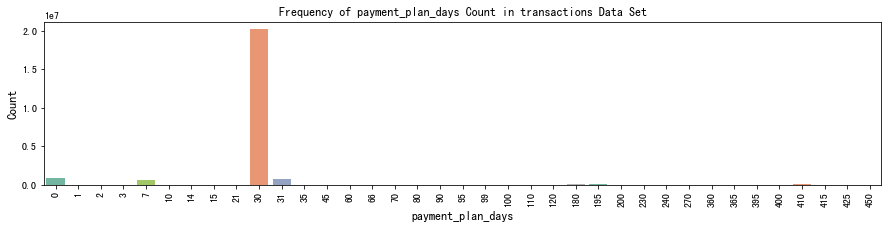

In [62]:
plt.figure(figsize=(15,3))
sns.countplot(x="payment_plan_days", data=kk_transaction, palette = "Set2")
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_plan_days', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_plan_days Count in transactions Data Set", fontsize=12)
plt.show()

In [63]:
# (kk_transaction["payment_plan_days"]==30).value_counts()

* **方案價格以149元的方案最常見：**

In [64]:
# kk_transaction["plan_list_price"].unique()

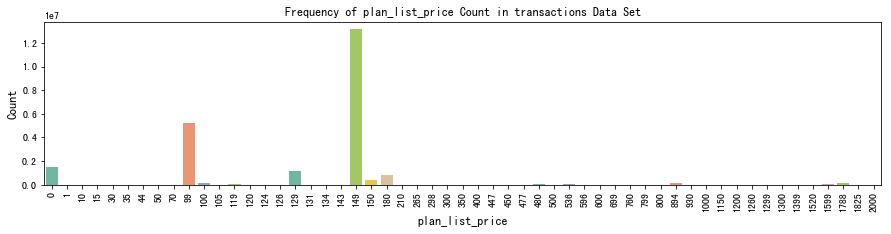

In [65]:
plt.figure(figsize=(15,3))
sns.countplot(x="plan_list_price", data=kk_transaction, palette = "Set2")
plt.ylabel('Count', fontsize=12)
plt.xlabel('plan_list_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of plan_list_price Count in transactions Data Set", fontsize=12)
plt.show()

* **特徵"plan_list_price"與"actual_amount_paid"相關性達96%，故可以只看"plan_list_price"**

In [66]:
kk_transaction['plan_list_price'].corr(kk_transaction['actual_amount_paid'],method='pearson') 

0.9635363002049566

* **特徵"is_auto_renew"自動續約筆數近2000萬筆**

In [67]:
kk_transaction["is_auto_renew"].value_counts()

1    19481725
0     3497030
Name: is_auto_renew, dtype: int64

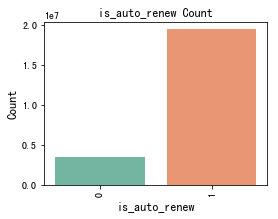

In [68]:
plt.figure(figsize=(4,3))
sns.countplot(x="is_auto_renew", data=kk_transaction, palette = "Set2")
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_auto_renew', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("is_auto_renew Count", fontsize=12)
plt.show()

### 小結: Transaction的msno有重複的，表示同一個人有很多次交易紀錄

## =======================================================================

### 8. 用戶聽歌紀錄_01
* **資料檔：user_logs.csv(說明：daily user logs describing listening behaviors of a user. Data collected until 2/28/2017.)**
* 特徵A. date: format %Y%m%d
* 特徵B. num_25/50/70/100: # of songs played less than 25%/50%/70%/100% of the song length
* 特徵C. num_985: # of songs played between 75% to 98.5% of the song length
* 特徵D. total_secs:  total seconds played

In [69]:
# 檔案太大，先不取
"""
kk_userlog = pd.read_csv("user_logs.csv", sep=',',engine = 'python',iterator=True)
loop = True
chunkSize = 1000
chunks = []
index=0
while loop:
    try:
        print(index)
        chunk = kk_userlog.get_chunk(chunkSize)
        chunks.append(chunk)
        index+=1

    except StopIteration:
        loop = False
        print("Iteration is stopped.")
print('Start')
kk_userlog = pd.concat(chunks, ignore_index= True)
"""

'\nkk_userlog = pd.read_csv("user_logs.csv", sep=\',\',engine = \'python\',iterator=True)\nloop = True\nchunkSize = 1000\nchunks = []\nindex=0\nwhile loop:\n    try:\n        print(index)\n        chunk = kk_userlog.get_chunk(chunkSize)\n        chunks.append(chunk)\n        index+=1\n\n    except StopIteration:\n        loop = False\n        print("Iteration is stopped.")\nprint(\'Start\')\nkk_userlog = pd.concat(chunks, ignore_index= True)\n'

In [70]:
kk_userlog = pd.read_csv("user_logs.csv", iterator=True)

In [71]:
# 歷遍(僅能觀察資料，無法進行資料整併)
chunk = kk_userlog.get_chunk(3)
chunk

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150513,0,0,0,0,1,1,280.335
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150709,9,1,0,0,7,11,1658.948
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150105,3,3,0,0,68,36,17364.956


### 9. 用戶聽歌紀錄_02
* **資料檔：user_logs_v2.csv(說明：same format as user_logs.csv, refreshed 11/06/2017, contains the user logs data until 3/31/2017.)**

In [72]:
kk_userlogV2 = pd.read_csv("user_logs_v2.csv")

In [73]:
kk_userlogV2.head(3)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337


* userlog的欄位特徵主要分成每個用戶聽一首歌的時間以及總時間，是否可以將總時間進行分類與流失率進行比較；或是將容易聽完整首歌的比例之類的進行分析(???

## ========================================================================

In [74]:
'''
print(f'submission01: {kk_submission01.shape}')
print(f'submission02: {kk_submission02.shape}')
print(f'members: {kk_members.shape}')
print(f'train01: {kk_train01.shape}')
print(f'train02: {kk_train02.shape}')
print(f'TrainingData: {kk_train.shape}')
print(f'transaction: {kk_transaction.shape}')
print(f'userlogV2: {kk_userlogV2.shape}')
'''

"\nprint(f'submission01: {kk_submission01.shape}')\nprint(f'submission02: {kk_submission02.shape}')\nprint(f'members: {kk_members.shape}')\nprint(f'train01: {kk_train01.shape}')\nprint(f'train02: {kk_train02.shape}')\nprint(f'TrainingData: {kk_train.shape}')\nprint(f'transaction: {kk_transaction.shape}')\nprint(f'userlogV2: {kk_userlogV2.shape}')\n"

## ====================================================

## 整理目前可以合併的部分

### A. 合併Training與Members欄位(取相同msno)

In [75]:
TrainingData = pd.merge(kk_train, kk_members, how="left", on="msno")

In [82]:
TrainingData['is_churn'] = TrainingData['is_churn'].astype('str')
TrainingData['city'] = TrainingData['city'].astype('str')
TrainingData['registered_via'] = TrainingData['registered_via'].astype('str')
TrainingData['registration_init_time'] = TrainingData.registration_init_time.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").date() if pd.notnull(x) else "NAN" )

In [84]:
TrainingData.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,2005-04-06
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,2005-04-07
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,2005-10-16
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,2005-11-02
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,2005-12-28


In [85]:
TrainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963891 entries, 0 to 1963890
Data columns (total 7 columns):
msno                      object
is_churn                  object
city                      object
bd                        float64
gender                    object
registered_via            object
registration_init_time    object
dtypes: float64(1), object(6)
memory usage: 119.9+ MB


* **共有21個城市的客戶及各自城市的客戶數量**

In [88]:
print(TrainingData["city"].unique()) # 用戶所在城市共有21種
# print(TrainingData["city"].value_counts())  # 各城市各自有多少用戶

['18.0' '10.0' '11.0' '13.0' '3.0' '6.0' '4.0' '14.0' '22.0' '17.0' '5.0'
 '9.0' '1.0' '15.0' 'nan' '12.0' '8.0' '7.0' '21.0' '20.0' '16.0' '19.0']


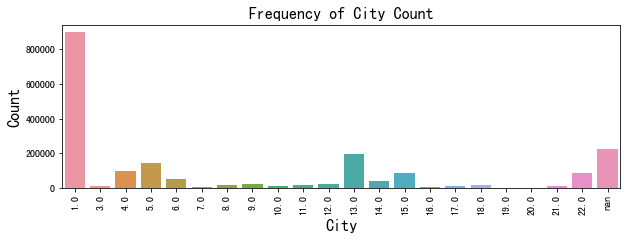

In [90]:
plt.figure(figsize=(10,3))
city_order = TrainingData['city'].unique()
city_order=sorted(city_order, key=lambda x: float(x))
sns.countplot(x="city", data=TrainingData , order = city_order)
plt.ylabel('Count', fontsize=16)
plt.xlabel('City', fontsize=16)
plt.xticks(rotation='vertical')
plt.title("Frequency of City Count", fontsize=16)
plt.show()

* **年齡的數據有點亂，可能要判斷一下是什麼格式?(Note: this column has outlier values ranging from -7000 to 2015, please use your judgement.)**

In [92]:
# TrainingData["bd"].unique().astype(int)

In [93]:
TrainingData["bd"] = TrainingData.bd.apply(lambda x: -1 if float(x)<=1 else x )
TrainingData["bd"] = TrainingData.bd.apply(lambda x: -1 if float(x)>=100 else x )

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


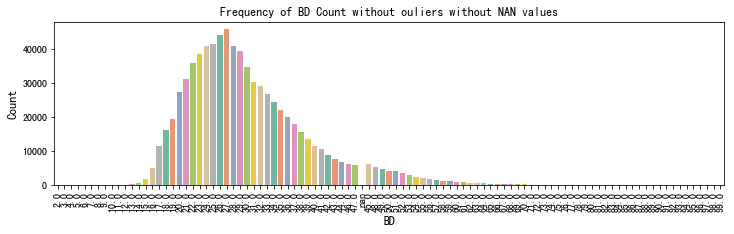

In [94]:
tmp_bd = TrainingData[(TrainingData.bd != "NaN") & (TrainingData.bd != -1)]
plt.figure(figsize=(12,3))
bd_order_2 = tmp_bd['bd'].unique()
bd_order_2 = sorted(bd_order_2, key=lambda x: float(x))
sns.countplot(x="bd", data=tmp_bd , order = bd_order_2, palette = "Set2")
plt.ylabel('Count', fontsize=12)
plt.xlabel('BD', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of BD Count without ouliers without NAN values", fontsize=12)
plt.show()

In [95]:
del tmp_bd

* **gender(性別)以現有資料(不考慮缺失值)，男女比例差不多**

In [96]:
TrainingData["gender"].unique()

array(['female', 'male', nan], dtype=object)

In [97]:
# for i in TrainingData["gender"].unique():
#     genderCount = 100*(TrainingData["gender"] == i).sum() / TrainingData["gender"].size
#     print(f'{i}:{genderCount:.2f}%')

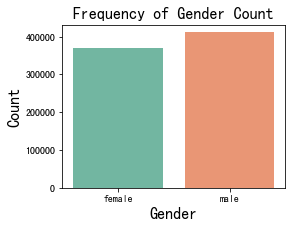

In [98]:
plt.figure(figsize=(4,3))
sns.countplot(x="gender", data=TrainingData, palette = "Set2")
plt.ylabel('Count', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.title("Frequency of Gender Count", fontsize=16)
plt.show()

* **registered_via共有5種登入方式**

In [99]:
TrainingData["registered_via"].unique()

array(['9.0', '7.0', 'nan', '3.0', '4.0', '13.0'], dtype=object)

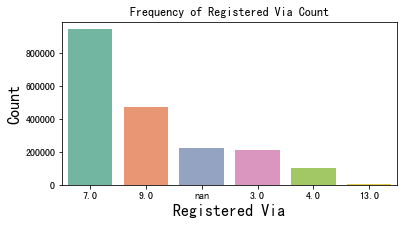

In [100]:
plt.figure(figsize=(6,3))
R_V_order = TrainingData['registered_via'].unique()
sns.countplot(x="registered_via", data=TrainingData, order=TrainingData["registered_via"].value_counts().index, palette = "Set2")
plt.ylabel('Count', fontsize=16)
plt.xlabel('Registered Via', fontsize=16)
plt.title("Frequency of Registered Via Count", fontsize=12)
plt.show()

In [103]:
TrainingData.shape  # 有196萬筆資料

(1963891, 7)

In [104]:
print(100*(TrainingData.isnull().sum()/len(TrainingData))) # 各特徵missing value比例

msno                       0.000000
is_churn                   0.000000
city                       0.000000
bd                        11.495699
gender                    60.252529
registered_via             0.000000
registration_init_time     0.000000
dtype: float64


* 特徵"gender"達到60%的missing value

### B. 交易資訊(Transaction)整理

In [105]:
kk_transaction.head(3)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,trans_date,mem_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0


In [106]:
Transaction = kk_transaction.groupby(by='msno')['payment_plan_days','plan_list_price','is_auto_renew','is_cancel'].sum()

In [111]:
Transaction['is_auto_renew'] = Transaction['is_auto_renew'].astype('str')
Transaction['is_cancel'] = Transaction['is_cancel'].astype('str')

In [112]:
Transaction.head()

,payment_plan_days,plan_list_price,is_auto_renew,is_cancel
msno,,,,
+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,7.0,0.0,0,0
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,805.0,3387.0,0,0
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,150.0,495.0,5,0
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,603.0,2980.0,21,0
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,780.0,3874.0,27,0


In [113]:
Transaction.shape

(2426143, 4)

In [114]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 2426143 entries, +++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY= to zzzyOgMk9MljCerbCCYrVtvu85aSCiy7yCMjAEgNYMs=
Data columns (total 4 columns):
payment_plan_days    float64
plan_list_price      float64
is_auto_renew        object
is_cancel            object
dtypes: float64(2), object(2)
memory usage: 181.8+ MB


In [115]:
# 合併TrainingData與Transaction
TrainingData = pd.merge(left=TrainingData, right=Transaction ,how='left',on=['msno'])

In [116]:
TrainingData.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_plan_days,plan_list_price,is_auto_renew,is_cancel
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,2005-04-06,37.0,149.0,0,0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,2005-04-07,663.0,3309.0,22,2
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,2005-10-16,300.0,1492.0,8,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,2005-11-02,850.0,1937.0,1,0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,2005-12-28,875.0,4053.0,0,0


In [117]:
print(TrainingData.shape)
TrainingData.info()

(1963891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963891 entries, 0 to 1963890
Data columns (total 11 columns):
msno                      object
is_churn                  object
city                      object
bd                        float64
gender                    object
registered_via            object
registration_init_time    object
payment_plan_days         float64
plan_list_price           float64
is_auto_renew             object
is_cancel                 object
dtypes: float64(3), object(8)
memory usage: 179.8+ MB


==========================================================================================

### ※特徵觀察整理

|特徵|型態|說明|
|:---:|:---:|:---:|
|msno|str|user id|
|is_churn|str|流失值|
|city|str(one-hot encode)|用戶所在地區|
|bd|float|年齡|
|gender|str|性別|
|registered_via|str(one-hot encode)|註冊路徑|
|registration_init_time|date|註冊日期|
|payment_method_id|str(one-hot encode)|付款方式|
|payment_plan_days|float|付款方案天數|
|plan_list_price|float|計畫方案價格|
|actual_amount_paid|float|實際方案價格|
|is_auto_renew|str|自動續約|
|transaction_date|date|交易日期|
|membership_expire_date|date|退訂或方案到期日|
|is_cancel|str|是否手動退訂|
|num_25/50/70/985/100|int|用戶聽歌完整度(%)|
|num_unq|沒有說明|沒有說明|
|total_secs|float|聽歌長度(sec)/day|

#### Submission & Train-----
* Submission作為測試集主要針對2017年3月退訂的客戶，於2017年4月是否續訂?Training Data則是2017年2月以前退訂，且30天內有無訂閱動作做為流失判定。Training Data的流失/續訂比差異較大(超過1:10)。

#### Members-----
* 特徵2. 用戶所在地區(city)；依目前觀察到的應有21個城市，但是沒有詳細說明哪些城市(且都以編碼表示)，只能進行分類以及各自城市用戶數有多少。
* 特徵3. 年齡(bd)：年齡的數據有點亂，必須要篩掉一些不合理值。
* 特徵4. 性別(gender)：性別的缺失值最多，達到約60%，可能要考慮如何處理缺失值。
* 特徵5. 登入方式(registered_via)：共有5種登入方式，沒有特別說明，可能是不同的裝置。
* 特徵6. 初始創建帳號日期(registration_init_time)：或許可以比較老用戶與新用戶流失值，以及比較聽歌時間的影響。
#### 交易紀錄-----
* 特徵7. 付款方式(payment_method_id)：交易付款方式都是以代號顯示，只能做分類(或許可以針對現有的付款方式去兜看看)。
* 特徵8. 一次付款方案天數(payment_plan_days)：以天數為單位，觀察資料以30天為最多(月租)。
* 特徵9. 計畫方案價格(plan_list_price)：應該與方案天數有高度相關(?
* 特徵10. 實際付費價格(actual_amount_paid)：與特徵9應該高度相關(重合?
* 特徵11. 自動續約(is_auto_renew)
* 特徵12+13. 交易日期(transaction_date)&退訂或合約到期日(membership_expire_date)：若這兩者日期相減等同合約日期則表示合約到期；如相減不等於合約到期，則表示客戶提前退訂，可以觀察是否影響到後續流失率(30天內不再續訂)。
* 特徵14. 取消(is_cancel)：客戶是否自動退訂，客戶自動退訂不等於流失(因為本資料流失的定義為退訂後30天沒有任何交易資料才算，所以有可能客戶退訂是為了要訂其他不同天方案。
#### 用戶紀錄(聽歌)-----
* 特徵15. 用戶聽歌完整度(num_25/50/70/985/100)：98.5%應該可以與100%完整聽完一樣意思(合併?)；聽不到25%的比例多的話是否代表沒有喜歡聽的類型，可能與流失值有關(?
* 特徵16. num_unq：沒有說明。
* 特徵17. 總聽歌長度(total_secs)：可以與註冊時間長短比例做比較來確認與流失值的關係(?
* 特徵18. 用戶id(msno)：可以拿來在不同資料做欄位對應。

===========================================================================================